In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
import h5py
from get_flamingo_info import get_flamingo_cosmo

In [12]:
sim_name1 = 'L1000N0900/HYDRO_FIDUCIAL'
sim_name2 = 'L1000N1800/HYDRO_FIDUCIAL'
sim_name3 = 'L1000N3600/HYDRO_FIDUCIAL'
sim_name_list = [sim_name1, sim_name2, sim_name3] #

<Figure size 1200x1200 with 0 Axes>

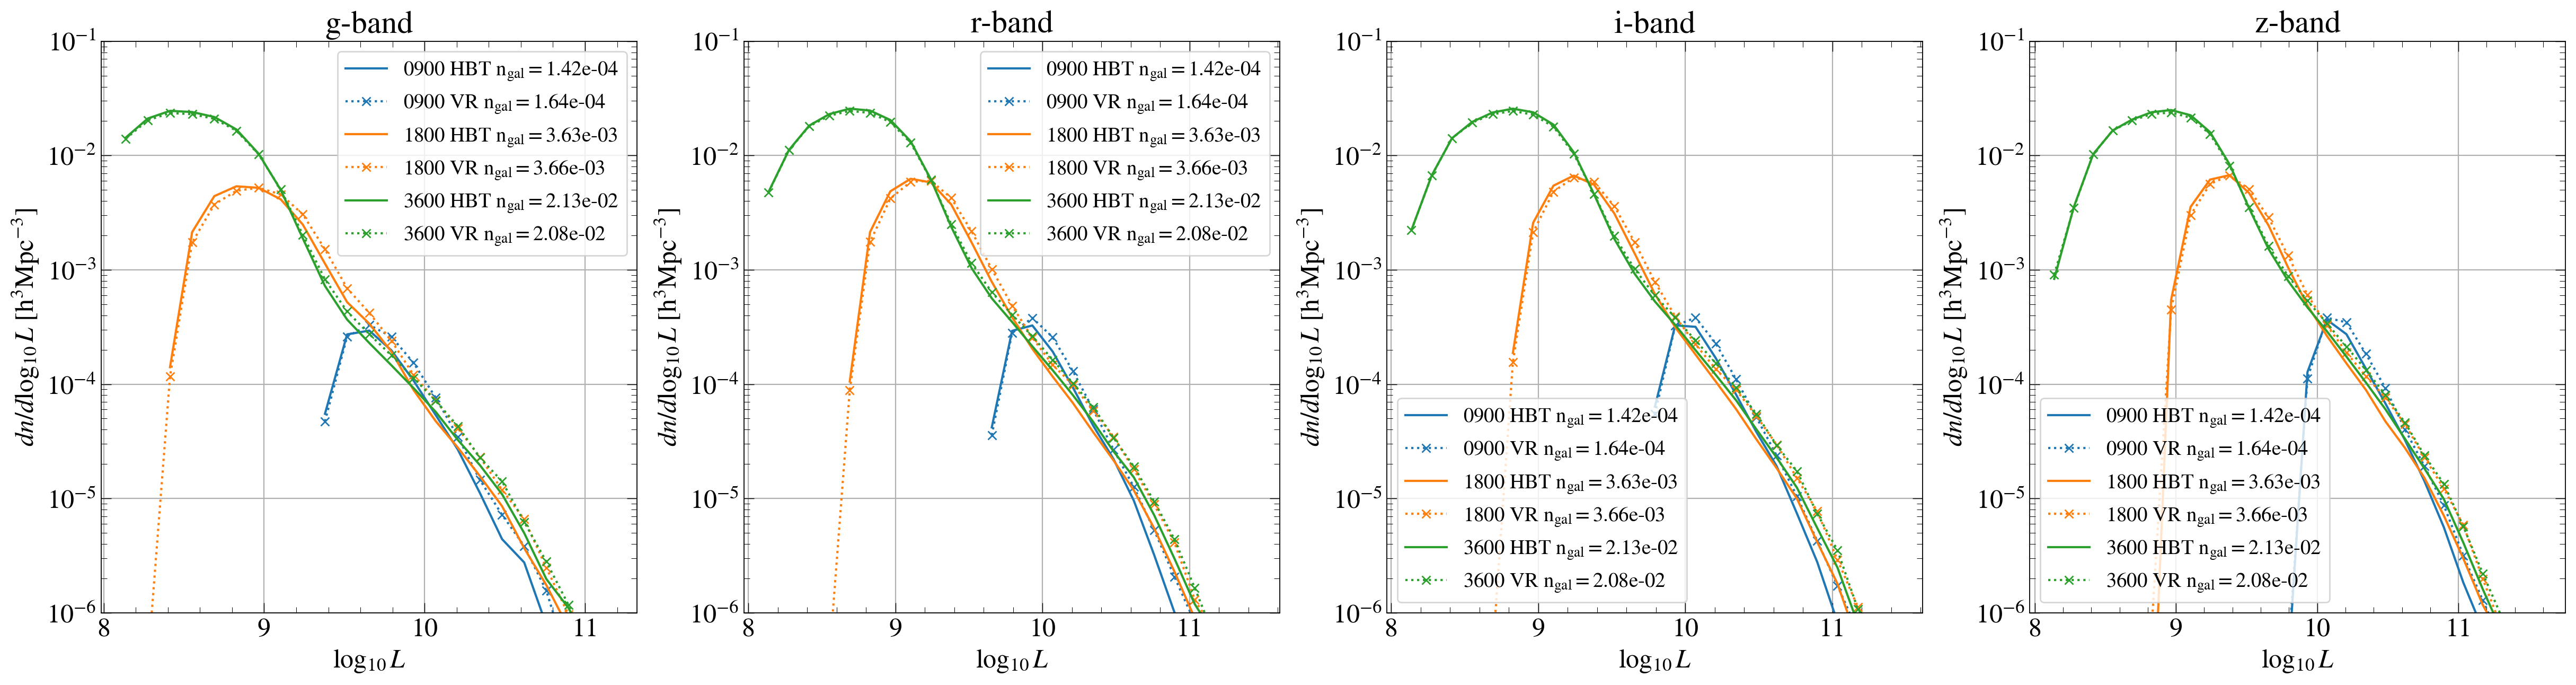

In [18]:
plt.figure()

band_list = ['g', 'r', 'i', 'z']

plt.figure(figsize=(30,7))

    
for iband in range(4):
    plt.subplot(1,4,1+iband)
    band = band_list[iband]
    for isim, sim_name in enumerate(sim_name_list):
        for halofinder in ['HBT', 'VR']:
            if halofinder == 'HBT':
                ls = '-'
                marker=None
            if halofinder == 'VR':
                ls = ':'
                marker = 'x'
            
            
            label = sim_name[6:10]+' '+halofinder
            output_loc = f'/cosma8/data/do012/dc-wu5/cylinder/output_{sim_name}/stats/'
            x_data, y_data = np.loadtxt(output_loc+f'LF_{halofinder}_{band}.dat', unpack=True)
            sel = (y_data > 0)
            x_data = x_data[sel]
            y_data = y_data[sel]
            ngal = np.loadtxt(output_loc+f'ngal_{halofinder}_{band}.dat', unpack=True)
            plt.plot(x_data, y_data, marker=marker, ls=ls, 
                     color=f'C{isim}', label=label+r' $\rm n_{gal}=$'+f'{ngal:.2e}')
    
            plt.legend(fontsize=14)
            plt.yscale('log')
            plt.xlabel(r'$\log_{10} L$')
            plt.ylabel(r'$dn/d\log_{10} L ~ [\rm h^{3}Mpc^{-3}]$');
            plt.ylim(1e-6, 1e-1)
            plt.title(band+'-band')
            
plt.savefig('../../plots/stats/LF_HBT_VR.png')

In [ ]:
## TODO: fit Schecter function
'''
def dndlogL(logL, para):
    lgLstar, alpha, beta, lgphistar = para
    Lstar = 10**lgLstar
    phistar = 10**lgphistar
    L = 10**logL
    return np.log(10) * phistar * (L/Lstar)**(alpha+1) * np.exp(-(L/Lstar)**beta)

def chisq(para):
    model = dndlogL(x_data, para)
    return np.sum((np.log10(model) - np.log10(y_data))**2)

print(chisq([10.25, -1.5, 1, -4]))
from scipy.optimize import minimize
res = minimize(chisq, x0=[10.25, -1.5, 1, -4], bounds=((10, 12), (-4, -1.2), (0,2), (-7,-3)))
print(res)
para_best = res.x
plt.plot(x_data, dndlogL(x_data, para_best), \
         label=r'best-fit Schechter function, $lg L_*$=%.3g, $\alpha$=%.2g, $\beta$=%.2g, $lg \phi_*=$%.2g'%(para_best[0],para_best[1],para_best[2],para_best[3]))
'''
